<h2 style='color:blue' align='center'>Data Augmentation To Address Overfitting In Flower Classification CNN</h2>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

We will download flowers dataset from google website and store it locally. In below call it downloads the zip file (.tgz) in cache_dir which is . meaning the current folder

<h3 style='color:purple'>Load flowers dataset</h3>

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [4]:
data_dir

PosixPath('datasets/flower_photos')

In [3]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/daisy/2476937534_21b285aa46_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/5673551_01d1ea993e_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/21402054779_759366efb0_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/173350276_02817aa8d5.jpg'),
 PosixPath('datasets/flower_photos/daisy/14330343061_99478302d4_m.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [9]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/7865295712_bcc94d120c.jpg'),
 PosixPath('datasets/flower_photos/roses/3412874275_ca78ee024d_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8462246855_1bdfee7478.jpg'),
 PosixPath('datasets/flower_photos/roses/17702388233_f29dc14834_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8667101118_87ea757b15.jpg')]

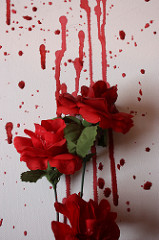

In [10]:
PIL.Image.open(str(roses[1]))

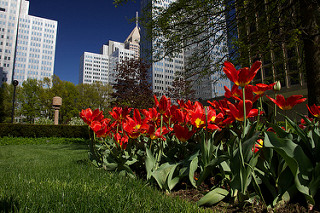

In [11]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

<h3 style='color:purple'>Read flowers images from disk into numpy array using opencv</h3>

In [12]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [13]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [14]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/7865295712_bcc94d120c.jpg'),
 PosixPath('datasets/flower_photos/roses/3412874275_ca78ee024d_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8462246855_1bdfee7478.jpg'),
 PosixPath('datasets/flower_photos/roses/17702388233_f29dc14834_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8667101118_87ea757b15.jpg')]

In [15]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/7865295712_bcc94d120c.jpg'

In [16]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [17]:
img.shape

(333, 500, 3)

In [18]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [19]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [20]:
X = np.array(X)
y = np.array(y)

<h3 style='color:purple'>Train test split</h3>

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [20]:
print(len(X_train)+ len(X_test))
print(len(X_train))
print(len(X_test))

3670
2752
918


<h3 style='color:purple'>Preprocessing: scale images</h3>

In [22]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

<h3 style='color:purple'>Build convolutional neural network and train it</h3>

In [22]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 93s 1s/step - loss: 1.3801 - accuracy: 0.4233
Epoch 2/30
86/86 [==============================] - 83s 959ms/step - loss: 1.0149 - accuracy: 0.5981
Epoch 3/30
86/86 [==============================] - 84s 974ms/step - loss: 0.8299 - accuracy: 0.6806
Epoch 4/30
86/86 [==============================] - 82s 961ms/step - loss: 0.6784 - accuracy: 0.7475
Epoch 5/30
86/86 [==============================] - 82s 956ms/step - loss: 0.5059 - accuracy: 0.8180
Epoch 6/30
86/86 [==============================] - 82s 951ms/step - loss: 0.3192 - accuracy: 0.8910
Epoch 7/30
86/86 [==============================] - 84s 969ms/step - loss: 0.1851 - accuracy: 0.9430
Epoch 8/30
86/86 [==============================] - 86s 1s/step - loss: 0.1037 - accuracy: 0.9698
Epoch 9/30
86/86 [==============================] - 88s 1s/step - loss: 0.0977 - accuracy: 0.9709
Epoch 10/30
86/86 [==============================] - 88s 1s/step - loss: 0.0549 - accuracy: 0.9840
E

In [23]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 14s 484ms/step - loss: 2.7495 - accuracy: 0.6362


[2.749511957168579, 0.6361655592918396]

**Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting**

In [24]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 8s 273ms/step


array([[  0.44443473,  24.64192   ,  13.07367   , -23.901205  ,
         -2.743028  ],
       [  2.5236263 ,   4.041882  ,  -1.779873  , -14.203923  ,
         14.352229  ],
       [ -1.7900168 ,   5.293926  ,  16.714561  ,  -5.894441  ,
         -5.168559  ],
       ...,
       [ -5.361447  , -10.532559  ,  14.688802  ,  15.575202  ,
         -1.0405294 ],
       [  3.741361  ,   2.1328113 ,  14.602292  ,   1.3237884 ,
         -9.341914  ],
       [-14.683879  , -17.281652  ,   3.9750016 ,  30.950085  ,
          9.379058  ]], dtype=float32)

In [25]:
score = tf.nn.softmax(predictions[0])

In [26]:
np.argmax(score)

1

In [27]:
y_test[0]

1

<h3 style='color:purple'>Improve Test Accuracy Using Data Augmentation</h3>

In [23]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(180,
                                                            180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomContrast(factor=0.2),
    layers.experimental.preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
  ]
)

**Original Image**

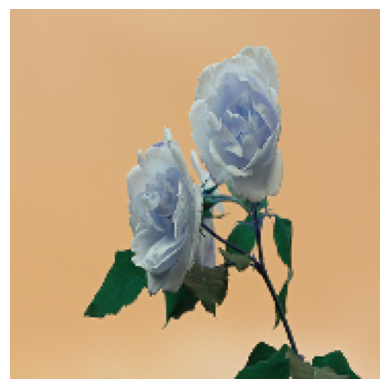

In [24]:
plt.axis('off')
plt.imshow(X[0])

**Newly generated training sample using data augmentation**

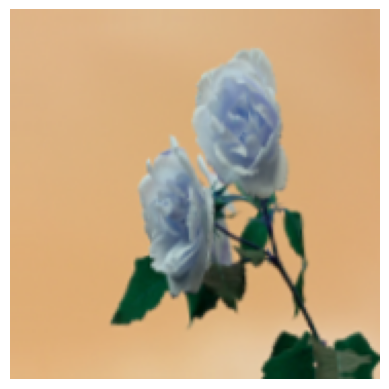

In [25]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

<h3 style='color:purple'>Train the model using data augmentation and a drop out layer</h3>

In [26]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 108s 1s/step - loss: 1.2600 - accuracy: 0.4553
Epoch 2/30
86/86 [==============================] - 106s 1s/step - loss: 1.0602 - accuracy: 0.5749
Epoch 3/30
86/86 [==============================] - 107s 1s/step - loss: 0.9580 - accuracy: 0.6206
Epoch 4/30
86/86 [==============================] - 105s 1s/step - loss: 0.9148 - accuracy: 0.6377
Epoch 5/30
86/86 [==============================] - 104s 1s/step - loss: 0.8450 - accuracy: 0.6719
Epoch 6/30
86/86 [==============================] - 110s 1s/step - loss: 0.8386 - accuracy: 0.6737
Epoch 7/30
86/86 [==============================] - 104s 1s/step - loss: 0.8175 - accuracy: 0.6759
Epoch 8/30
86/86 [==============================] - 105s 1s/step - loss: 0.7646 - accuracy: 0.7002
Epoch 9/30
86/86 [==============================] - 104s 1s/step - loss: 0.7318 - accuracy: 0.7264
Epoch 10/30
86/86 [==============================] - 106s 1s/step - loss: 0.7142 - accuracy: 0.7213
Epoch 11/

In [27]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 9s 318ms/step - loss: 0.8637 - accuracy: 0.7168


[0.8636993169784546, 0.7167755961418152]